#### This notebook aims to conduct the business analysis after already having trained the model. Code here is mainly used for EDA and explanations of model application to the business use case. 

In [41]:
import pandas as pd
import os

for file in os.listdir('cleaned_data'):
    df = pd.read_csv(f'cleaned_data/{file}')
    print(f'Head of {file}:')
    print(df.head())
    print('\n' + '='*40 + '\n')

Head of supplier_scorecard_clean.csv:
  SupplierName       Month  PackagesHandled  BadPackagingRate (%)  \
0    SupplierA  2023-01-01             7841                  8.46   
1    SupplierA  2023-02-01             7196                  7.78   
2    SupplierA  2023-03-01             7842                  7.94   
3    SupplierA  2023-04-01             7587                  7.70   
4    SupplierA  2023-05-01             8010                  7.77   

   TotalIncidents  AverageCostPerIncident (€)  OnTimeDeliveryRate (%)  \
0             133                      538.23                   86.01   
1             153                      572.14                   88.09   
2             163                      547.51                   84.74   
3             158                      588.33                   91.58   
4             166                      618.34                   96.87   

   AnomaliesDetected  
0                 23  
1                 16  
2                 21  
3               

In [42]:
df = pd.read_csv(f'merged_data/complete_merged_dataset.csv')
print(f'Head of {file}:')
print(df.head())
print('\n' + '='*40 + '\n')

Head of density_reports_clean.csv:
     ReportID ProductReference DateOfReport SupplierName GarmentType  \
0  RPT0000001         PRD07271   2024-03-04    SupplierA       Pants   
1  RPT0000002         PRD00861   2024-05-27    SupplierC     T-Shirt   
2  RPT0000003         PRD05391   2023-11-18    SupplierA       Shirt   
3  RPT0000004         PRD05192   2024-06-13    SupplierA        Coat   
4  RPT0000005         PRD05735   2023-07-18    SupplierA        Coat   

    Material  Weight  ProposedUnitsPerCarton ProposedFoldingMethod  \
0  Polyester    0.35                    29.0               Method2   
1      Denim    0.21                    20.0               Method2   
2     Cotton    0.20                    31.0               Method1   
3     Cotton    1.30                     5.0               Method1   
4  Polyester    1.11                     9.0               Method2   

  ProposedLayout  ...  Quarter DayOfWeek WeekOfYear IsSummer IsWinter  \
0        LayoutC  ...        1        

In [43]:
incidents = pd.read_csv('cleaned_data/historical_incidents_clean.csv')
incidents.head()

,ProductReference,SupplierName,DateOfIncident,IssueDescription,ResolutionStatus,CostImpact (€)
0,PRD08586,SupplierC,2023-10-25,Other,Resolved,69.0
1,PRD06004,SupplierA,2024-03-07,Packaging Damage,Resolved,1912.0
2,PRD04841,SupplierC,2023-01-19,Missing Items,Resolved,379.0
3,PRD02036,SupplierC,2024-05-28,Other,In Progress,327.0
4,PRD02537,SupplierE,2023-08-11,Incorrect Folding,Not Resolved,560.0


  SupplierName  total_incidents  total_cost  avg_cost_per_incident
0    SupplierA             3149  1770584.00             562.268657
1    SupplierB             3356  1844208.75             549.525849
2    SupplierC             3382  1825843.75             539.871008
3    SupplierD             2758  1478675.00             536.140319
4    SupplierE             1627   869922.25             534.678703
5    SupplierF             1966  1133987.50             576.799339
6    SupplierG              825   484848.00             587.694545
7    SupplierH              937   585815.75             625.203575


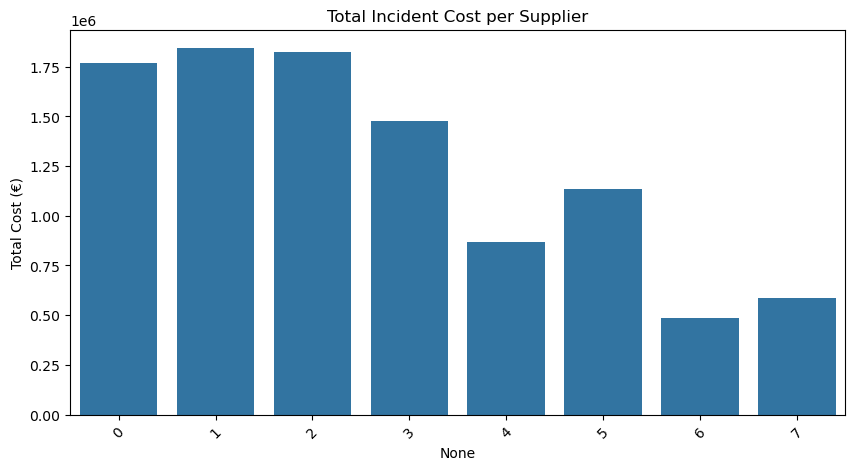

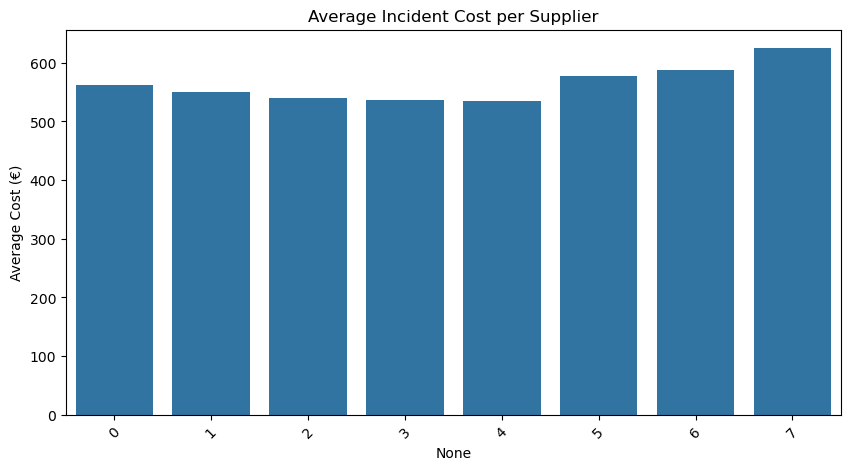

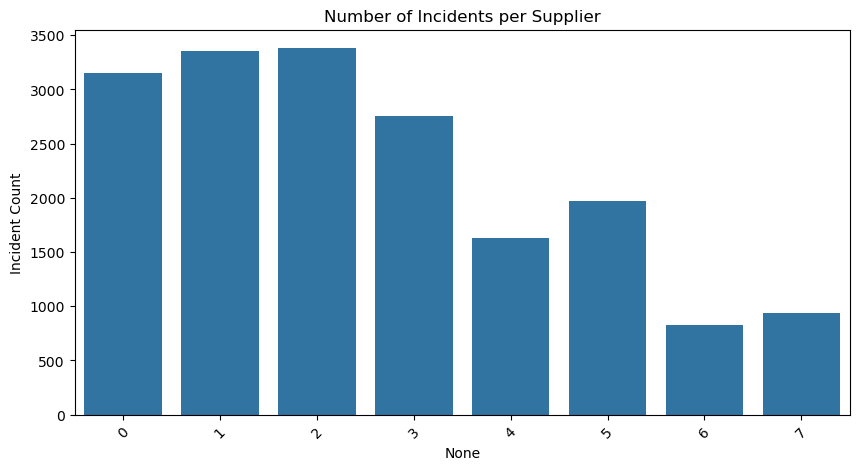

0    562.268657
1    549.525849
2    539.871008
3    536.140319
4    534.678703
5    576.799339
6    587.694545
7    625.203575
Name: avg_cost_per_incident, dtype: float64


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your cleaned incident data is in a DataFrame called incidents_df
# For example:
# incidents_df = pd.read_csv('your_incident_data.csv')

# Summarize total incidents, total and average cost per supplier
incident_cost_summary = incidents.groupby('SupplierName').agg(
    total_incidents=('DateOfIncident', 'count'),
    total_cost=('CostImpact (€)', 'sum'),
    avg_cost_per_incident=('CostImpact (€)', 'mean')
).reset_index()

print(incident_cost_summary)

# Plot total cost per supplier
plt.figure(figsize=(10,5))
sns.barplot(x=incident_cost_summary.index, y='total_cost', data=incident_cost_summary)
plt.title('Total Incident Cost per Supplier')
plt.ylabel('Total Cost (€)')
plt.xticks(rotation=45)
plt.show()

# Plot average cost per incident per supplier
plt.figure(figsize=(10,5))
sns.barplot(x=incident_cost_summary.index, y='avg_cost_per_incident', data=incident_cost_summary)
plt.title('Average Incident Cost per Supplier')
plt.ylabel('Average Cost (€)')
plt.xticks(rotation=45)
plt.show()

# Plot incident count per supplier
plt.figure(figsize=(10,5))
sns.barplot(x=incident_cost_summary.index, y='total_incidents', data=incident_cost_summary)
plt.title('Number of Incidents per Supplier')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.show()

print(incident_cost_summary['avg_cost_per_incident'])


In [45]:
complete_merged_dataset = pd.read_csv('merged_data/complete_merged_dataset.csv')

# Count unique reports per supplier
reports_per_supplier = complete_merged_dataset.groupby('SupplierName')['ReportID'].nunique().reset_index()
reports_per_supplier.rename(columns={'ReportID': 'ReportCount'}, inplace=True)

# Calculate total reports for percentage
total_reports = reports_per_supplier['ReportCount'].sum()
reports_per_supplier['ReportPct'] = 100 * reports_per_supplier['ReportCount'] / total_reports

print(reports_per_supplier)


  SupplierName  ReportCount  ReportPct
0    SupplierA       138565  28.385742
1    SupplierB       109644  22.461129
2    SupplierC        74368  15.234661
3    SupplierD        52197  10.692820
4    SupplierE        39722   8.137253
5    SupplierF        33670   6.897470
6    SupplierG        24916   5.104169
7    SupplierH        15068   3.086756


In [46]:
# Merge on SupplierName
comparison_df = pd.merge(reports_per_supplier, incident_cost_summary[['SupplierName', 'total_incidents']], on='SupplierName', how='left')
comparison_df['total_incidents'] = comparison_df['total_incidents'].fillna(0)

print(comparison_df)


  SupplierName  ReportCount  ReportPct  total_incidents
0    SupplierA       138565  28.385742             3149
1    SupplierB       109644  22.461129             3356
2    SupplierC        74368  15.234661             3382
3    SupplierD        52197  10.692820             2758
4    SupplierE        39722   8.137253             1627
5    SupplierF        33670   6.897470             1966
6    SupplierG        24916   5.104169              825
7    SupplierH        15068   3.086756              937


  SupplierName  ReportCount  total_incidents  ExpectedIncidents  IncidentRatio
0    SupplierA       138565             3149        5109.433576       0.616311
1    SupplierB       109644             3356        4043.003175       0.830076
2    SupplierC        74368             3382        2742.239066       1.233299
3    SupplierD        52197             2758        1924.707569       1.432945
4    SupplierE        39722             1627        1464.705521       1.110803
5    SupplierF        33670             1966        1241.544607       1.583511
6    SupplierG        24916              825         918.750384       0.897959
7    SupplierH        15068              937         555.616102       1.686416


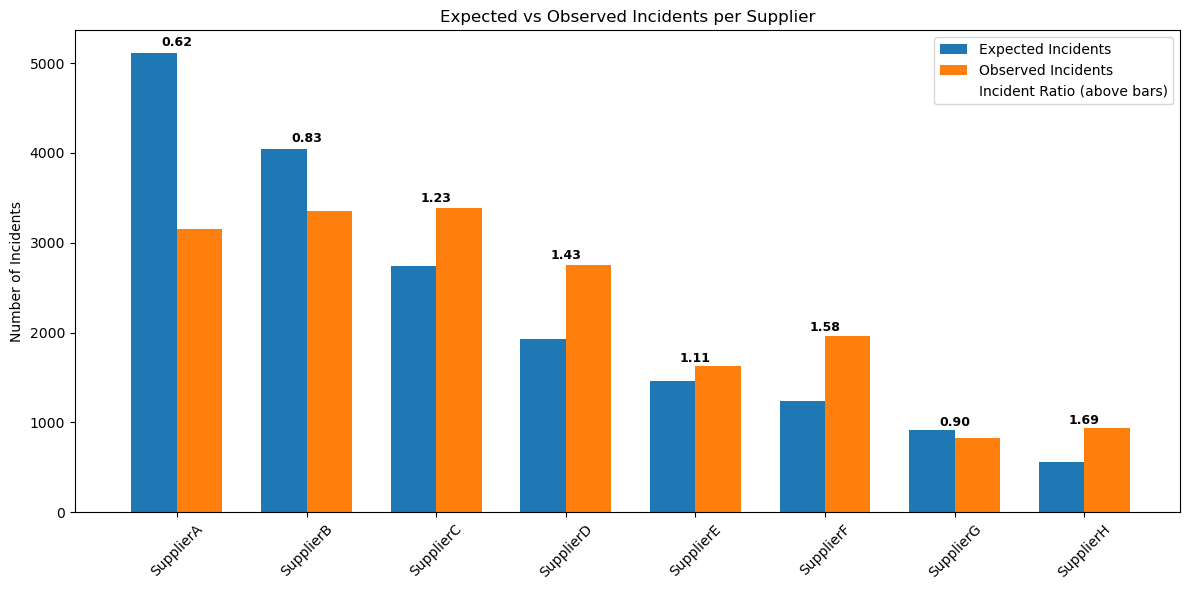

In [47]:
# Calculate total reports and total incidents
total_reports = comparison_df['ReportCount'].sum()
total_incidents = comparison_df['total_incidents'].sum()

# Calculate expected incidents proportional to report count
comparison_df['ExpectedIncidents'] = total_incidents * (comparison_df['ReportCount'] / total_reports)

# Calculate incident ratio
comparison_df['IncidentRatio'] = comparison_df['total_incidents'] / comparison_df['ExpectedIncidents']

# Sort suppliers by IncidentRatio descending
comparison_df_sorted_2 = comparison_df #.sort_values(by='IncidentRatio', ascending=False)

print(comparison_df_sorted_2[['SupplierName', 'ReportCount', 'total_incidents', 'ExpectedIncidents', 'IncidentRatio']])

# Plot actual vs expected incidents side-by-side

import matplotlib.pyplot as plt
import numpy as np

ind = np.arange(len(comparison_df_sorted_2))
width = 0.35

plt.figure(figsize=(12,6))
bars_expected = plt.bar(ind - width/2, comparison_df_sorted_2['ExpectedIncidents'], width, label='Expected Incidents')
bars_actual = plt.bar(ind + width/2, comparison_df_sorted_2['total_incidents'], width, label='Observed Incidents')

plt.xticks(ind, comparison_df_sorted_2['SupplierName'], rotation=45)
plt.ylabel('Number of Incidents')
plt.title('Expected vs Observed Incidents per Supplier')

# Add IncidentRatio labels above bars
for i in ind:
    y = max(comparison_df_sorted_2.loc[i, 'ExpectedIncidents'], comparison_df_sorted_2.loc[i, 'total_incidents'])
    ratio = comparison_df_sorted_2.loc[i, 'IncidentRatio']
    plt.text(i, y + y*0.01, f'{ratio:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add dummy bar for Incident Ratio in legend
plt.bar(0, 0, color='white', label='Incident Ratio (above bars)')

plt.legend()
plt.tight_layout()
plt.show()



  SupplierName  ReportCount  total_incidents  ExpectedIncidents  \
0    SupplierA       138565             3149        5109.433576   
1    SupplierB       109644             3356        4043.003175   
2    SupplierC        74368             3382        2742.239066   
3    SupplierD        52197             2758        1924.707569   
4    SupplierE        39722             1627        1464.705521   
5    SupplierF        33670             1966        1241.544607   
6    SupplierG        24916              825         918.750384   
7    SupplierH        15068              937         555.616102   

   IncidentRatio  avg_cost_per_incident  
0       0.616311             562.268657  
1       0.830076             549.525849  
2       1.233299             539.871008  
3       1.432945             536.140319  
4       1.110803             534.678703  
5       1.583511             576.799339  
6       0.897959             587.694545  
7       1.686416             625.203575  


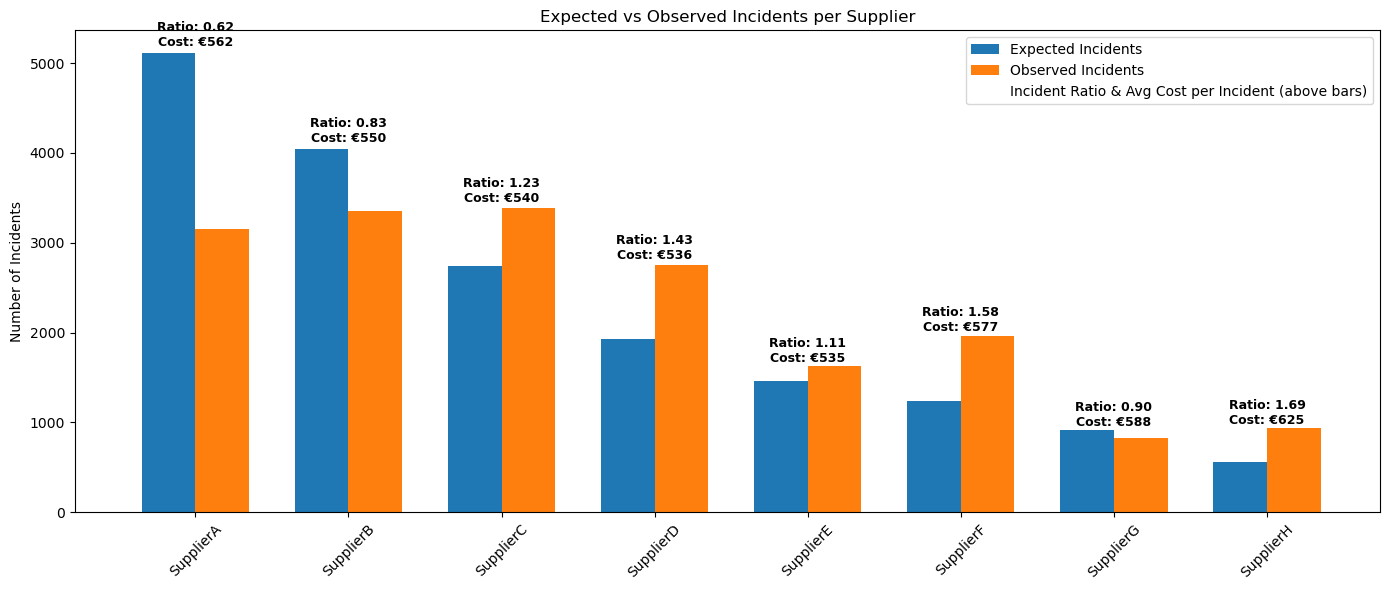

In [48]:
# Assuming comparison_df_sorted_2 and incident_cost_summary are available

# Merge average cost per incident into comparison_df_sorted_2 by SupplierName
comparison_df_sorted_2 = comparison_df_sorted_2.merge(
    incident_cost_summary[['SupplierName', 'avg_cost_per_incident']], 
    on='SupplierName', 
    how='left'
)

# Print updated table with cost info
print(comparison_df_sorted_2[['SupplierName', 'ReportCount', 'total_incidents', 'ExpectedIncidents', 'IncidentRatio', 'avg_cost_per_incident']])

# Now update your plotting code to optionally show avg_cost_per_incident as text above each supplier group

import matplotlib.pyplot as plt
import numpy as np

ind = np.arange(len(comparison_df_sorted_2))
width = 0.35

plt.figure(figsize=(14,6))
bars_expected = plt.bar(ind - width/2, comparison_df_sorted_2['ExpectedIncidents'], width, label='Expected Incidents')
bars_actual = plt.bar(ind + width/2, comparison_df_sorted_2['total_incidents'], width, label='Observed Incidents')

plt.xticks(ind, comparison_df_sorted_2['SupplierName'], rotation=45)
plt.ylabel('Number of Incidents')
plt.title('Expected vs Observed Incidents per Supplier')

# Add IncidentRatio labels above bars
for i in ind:
    y = max(comparison_df_sorted_2.loc[i, 'ExpectedIncidents'], comparison_df_sorted_2.loc[i, 'total_incidents'])
    ratio = comparison_df_sorted_2.loc[i, 'IncidentRatio']
    cost = comparison_df_sorted_2.loc[i, 'avg_cost_per_incident']
    plt.text(i, y + y*0.01, f'Ratio: {ratio:.2f} Cost: €{cost:.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add dummy bar for Incident Ratio in legend
plt.bar(0, 0, color='white', label='Incident Ratio & Avg Cost per Incident (above bars)')

plt.legend()
plt.tight_layout()
plt.show()


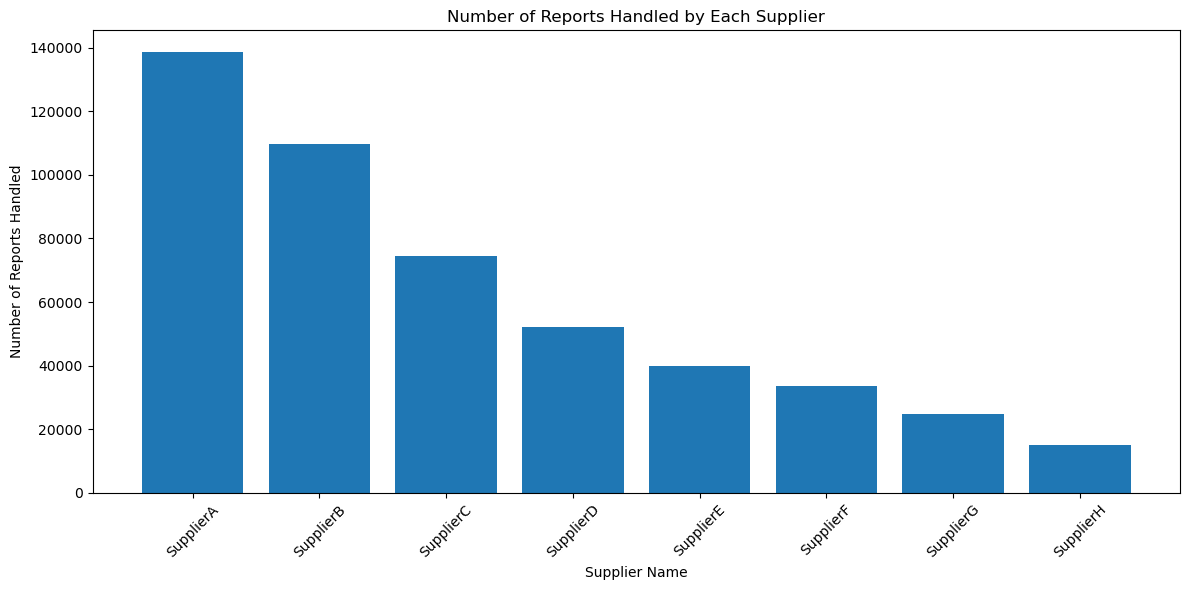

In [49]:
import matplotlib.pyplot as plt

# Group by SupplierName and count ReportID
report_counts = df.groupby('SupplierName')['ReportID'].count().reset_index()
report_counts = report_counts.sort_values(by='ReportID', ascending=False)

# Plot
plt.figure(figsize=(12,6))
plt.bar(report_counts['SupplierName'], report_counts['ReportID'])
plt.xticks(rotation=45)
plt.xlabel('Supplier Name')
plt.ylabel('Number of Reports Handled')
plt.title('Number of Reports Handled by Each Supplier')
plt.tight_layout()
plt.show()


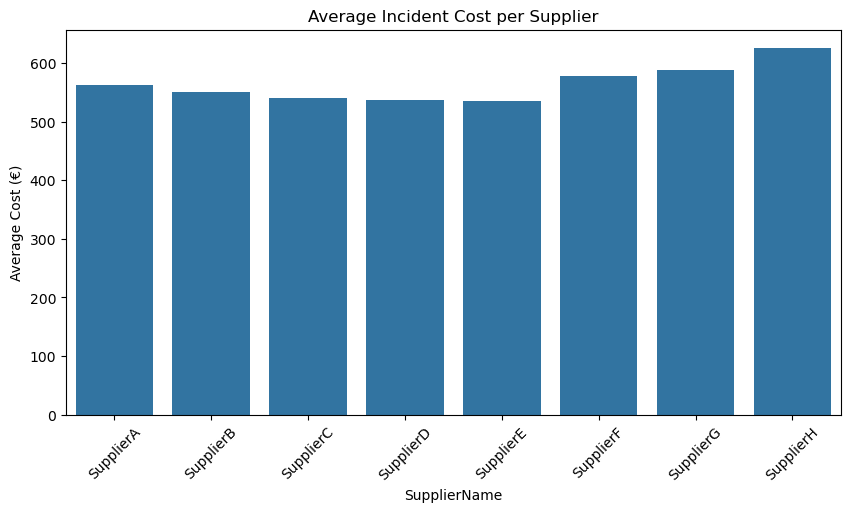

In [50]:
# Plot average cost per incident per supplier
plt.figure(figsize=(10,5))
sns.barplot(x='SupplierName', y='avg_cost_per_incident', data=incident_cost_summary)
plt.title('Average Incident Cost per Supplier')
plt.ylabel('Average Cost (€)')
plt.xticks(rotation=45)
plt.show()

In [51]:
import pandas as pd

# Ensure you have comparison_df_sorted_2 with these columns:
# 'SupplierName', 'total_incidents' (observed), 'ExpectedIncidents', 'avg_cost_per_incident'

# Calculate minimized incident count per supplier (lower of observed and expected)
comparison_df_sorted_2['MinIncidents'] = comparison_df_sorted_2[['total_incidents', 'ExpectedIncidents']].min(axis=1)

# Calculate cost at minimized incident count
comparison_df_sorted_2['CostAtMinIncidents'] = comparison_df_sorted_2['MinIncidents'] * comparison_df_sorted_2['avg_cost_per_incident']

# Calculate current cost at observed incidents
comparison_df_sorted_2['CostAtObservedIncidents'] = comparison_df_sorted_2['total_incidents'] * comparison_df_sorted_2['avg_cost_per_incident']

# Calculate savings as difference between current cost and minimized cost
comparison_df_sorted_2['EstimatedSavings'] = comparison_df_sorted_2['CostAtObservedIncidents'] - comparison_df_sorted_2['CostAtMinIncidents']

# Create new DataFrame with relevant columns
savings_df = comparison_df_sorted_2[['SupplierName', 'total_incidents', 'ExpectedIncidents', 'MinIncidents',
                                     'avg_cost_per_incident', 'CostAtObservedIncidents', 'CostAtMinIncidents', 'EstimatedSavings']]

# Calculate total savings
total_savings = savings_df['EstimatedSavings'].sum()

print(savings_df)
print(f"Total Estimated Savings by Reducing Incidents: €{total_savings:,.2f}")


  SupplierName  total_incidents  ExpectedIncidents  MinIncidents  \
0    SupplierA             3149        5109.433576   3149.000000   
1    SupplierB             3356        4043.003175   3356.000000   
2    SupplierC             3382        2742.239066   2742.239066   
3    SupplierD             2758        1924.707569   1924.707569   
4    SupplierE             1627        1464.705521   1464.705521   
5    SupplierF             1966        1241.544607   1241.544607   
6    SupplierG              825         918.750384    825.000000   
7    SupplierH              937         555.616102    555.616102   

   avg_cost_per_incident  CostAtObservedIncidents  CostAtMinIncidents  \
0             562.268657               1770584.00        1.770584e+06   
1             549.525849               1844208.75        1.844209e+06   
2             539.871008               1825843.75        1.480455e+06   
3             536.140319               1478675.00        1.031913e+06   
4             534.6787

In [54]:
print(savings_df[['SupplierName', 'EstimatedSavings']].assign(EstimatedSavings=lambda x: x['EstimatedSavings'].round(2)))
print(f"Total Estimated Savings by Reducing Incidents: €{total_savings:,.2f}")


  SupplierName  EstimatedSavings
0    SupplierA              0.00
1    SupplierB              0.00
2    SupplierC         345388.38
3    SupplierD         446761.67
4    SupplierE          86775.40
5    SupplierF         417865.39
6    SupplierG              0.00
7    SupplierH         238442.58
Total Estimated Savings by Reducing Incidents: €1,535,233.42


In [55]:
# Prepare the table with formatted EstimatedSavings as currency
def currency_format(x):
    if x == 0:
        return "€0.00"
    else:
        return f"€{x:,.2f}"

styled_table = savings_df[['SupplierName', 'EstimatedSavings']].copy()

# Format EstimatedSavings as currency strings
styled_table['EstimatedSavings'] = styled_table['EstimatedSavings'].apply(currency_format)

# Add a total row
total_row = pd.DataFrame({'SupplierName': ['Total Estimated Savings'], 
                          'EstimatedSavings': [f"€{total_savings:,.2f}"]})

styled_table = pd.concat([styled_table, total_row], ignore_index=True)

# Display nicely (for example, in a Jupyter notebook or export to HTML)
styled_table.style.set_properties(**{'text-align': 'left'}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'left')]}])


,SupplierName,EstimatedSavings
0,SupplierA,€0.00
1,SupplierB,€0.00
2,SupplierC,"€345,388.38"
3,SupplierD,"€446,761.67"
4,SupplierE,"€86,775.40"
5,SupplierF,"€417,865.39"
6,SupplierG,€0.00
7,SupplierH,"€238,442.58"
8,Total Estimated Savings,"€1,535,233.42"


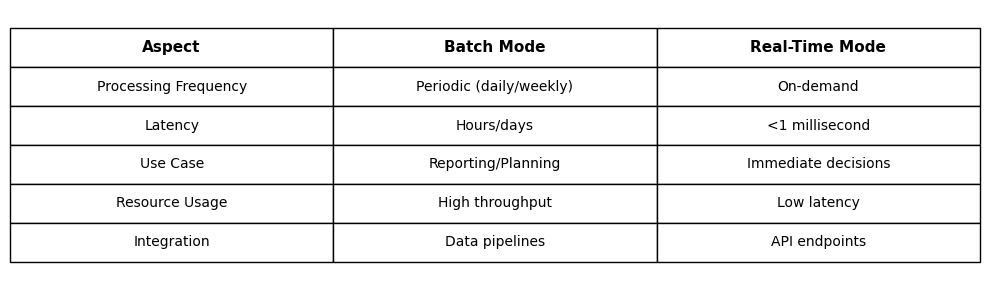

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    "Aspect": [
        "Processing Frequency",
        "Latency",
        "Use Case",
        "Resource Usage",
        "Integration"
    ],
    "Batch Mode": [
        "Periodic (daily/weekly)",
        "Hours/days",
        "Reporting/Planning",
        "High throughput",
        "Data pipelines"
    ],
    "Real-Time Mode": [
        "On-demand",
        "<1 millisecond",
        "Immediate decisions",
        "Low latency",
        "API endpoints"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')  # Remove axes

# Create table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Style
table.scale(1, 2)  # Adjust row height
table.auto_set_font_size(False)
table.set_fontsize(10)

# Bold header
for i in range(len(df.columns)):
    table[0, i].set_fontsize(11)
    table[0, i].set_text_props(weight='bold')

plt.tight_layout()
plt.show()
